In [2]:
import numpy as np
import astropy.io.fits as pf
import matplotlib
from matplotlib import pyplot as plt
import lmfit
from lmfit import minimize, Parameters, report_fit, fit_report
from IPython.display import Image
import datascience as ds

In [3]:
%matplotlib inline

## Plots of 5 H-alpha absorption features with wavelength on x-axis

First Target Object:HIP68369


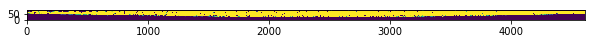

In [9]:
file1 = pf.open('rbni.983.fits')
header1 = file1[0].header
target_object1 = header1['TOBJECT']
print ("First Target Object:"+target_object1)

image1 = file1[0].data
image_flip1 = np.fliplr(image1)
plt.figure(figsize=(10,10))
plt.imshow(image_flip1, vmin = np.median(image_flip1), vmax = np.median(image_flip1) * 1.2, origin = 'lower')

(79, 4608)


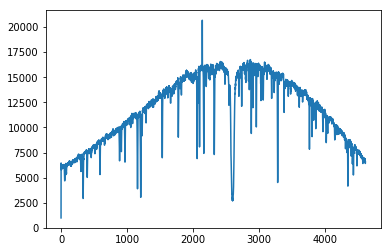

In [10]:
plt.plot(image_flip1[53])
print (image_flip1.shape)

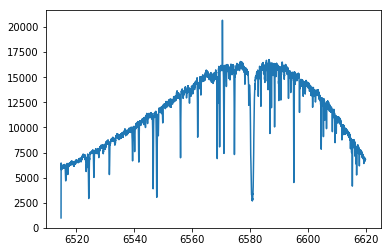

In [11]:
wave = pf.open('apf_wav copy.fits')
wave_values = wave[0].data
x1 = wave_values[53,0:4600]
y1 = image_flip1[53,0:4600]
plt.plot(x1,y1)

Second Target Object:HIP74975


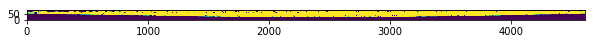

In [12]:
file2 = pf.open('rbni.993.fits')
header2 = file2[0].header
target_object2 = header2['TOBJECT']
print ("Second Target Object:"+target_object2)

image2 = file2[0].data
image_flip2 = np.fliplr(image2)
plt.figure(figsize=(10,10))
plt.imshow(image_flip2, vmin = np.median(image_flip2), vmax = np.median(image_flip2) * 1.2, origin = 'lower')

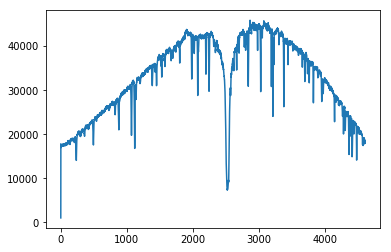

In [13]:
plt.plot(image_flip2[53])

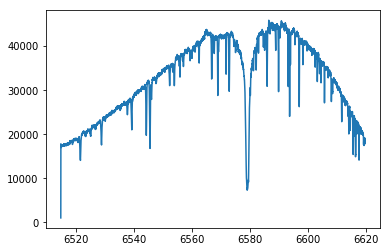

In [14]:
y2 = image_flip2[53,0:4600]
plt.plot(x1,y2)

Third Target Object:HIP61020


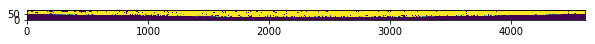

In [15]:
file3 = pf.open('rbnj.172.fits')
header3 = file3[0].header
target_object3 = header3['TOBJECT']
print ("Third Target Object:"+target_object3)

image3 = file3[0].data
image_flip3 = np.fliplr(image3)
plt.figure(figsize=(10,10))
plt.imshow(image_flip3, vmin = np.median(image_flip3), vmax = np.median(image_flip3) * 1.2, origin = 'lower')

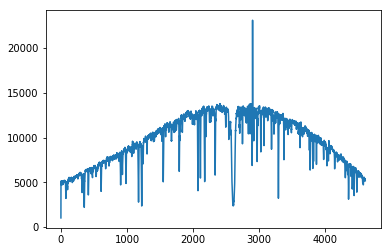

In [16]:
plt.plot(image_flip3[53])

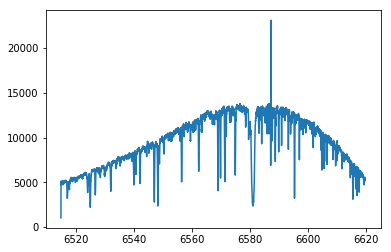

In [17]:
y3 = image_flip3[53,0:4600]
plt.plot(x1,y3)

First Target Object:HIP19614


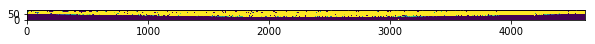

In [18]:
file4 = pf.open('rbnj.231.fits')
header4 = file4[0].header
target_object4 = header4['TOBJECT']
print ("First Target Object:"+target_object4)

image4 = file4[0].data
image_flip4 = np.fliplr(image4)
plt.figure(figsize=(10,10))
plt.imshow(image_flip4, vmin = np.median(image_flip4), vmax = np.median(image_flip4) * 1.2, origin = 'lower')

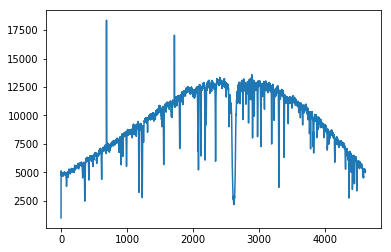

In [19]:
plt.plot(image_flip4[53])

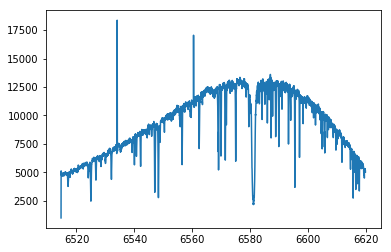

In [20]:
y4 = image_flip4[53,0:4600]
plt.plot(x1,y4)

First Target Object:HIP22938


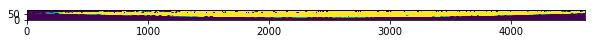

In [21]:
file5 = pf.open('rbnj.234.fits')
header5 = file5[0].header
target_object5 = header5['TOBJECT']
print ("First Target Object:"+target_object5)

image5 = file5[0].data
image_flip5 = np.fliplr(image5)
plt.figure(figsize=(10,10))
plt.imshow(image_flip5, vmin = np.median(image_flip5), vmax = np.median(image_flip5) * 1.2, origin = 'lower')

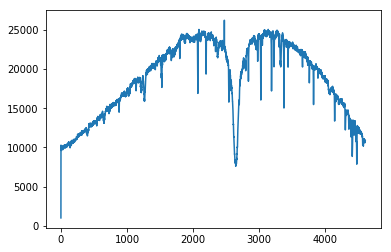

In [22]:
plt.plot(image_flip5[53])

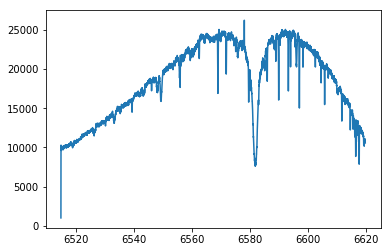

In [23]:
y5 = image_flip5[53,0:4600]
plt.plot(x1,y5)

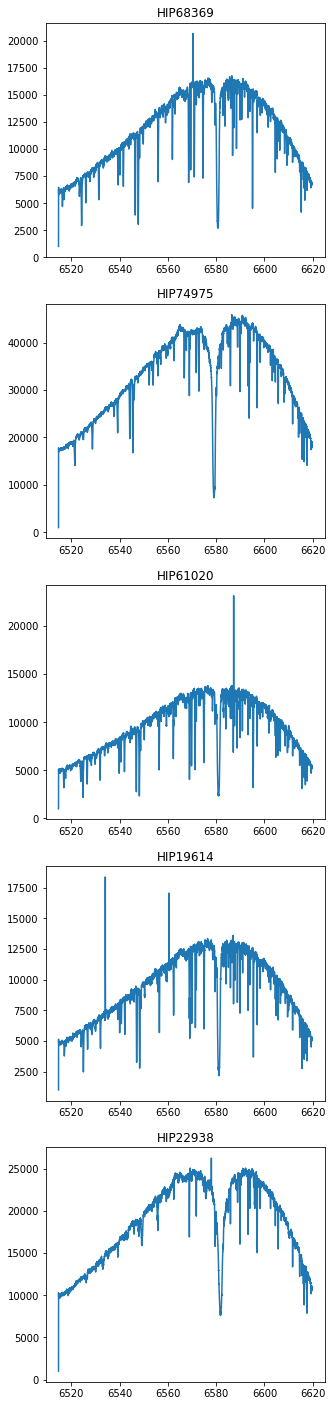

In [24]:
plt.figure(figsize = (5,25))
plt.subplot(511).set_title(target_object1)
plt.plot(x1,y1)
plt.subplot(512).set_title(target_object2)
plt.plot(x1,y2)
plt.subplot(513).set_title(target_object3)
plt.plot(x1,y3)
plt.subplot(514).set_title(target_object4)
plt.plot(x1,y4)
plt.subplot(515).set_title(target_object5)
plt.plot(x1,y5)

## Normalized plots

In [25]:
def normalized_plot(percentile):
    for i in np.arange(0,5):
        files = np.array(['rbni.983.fits','rbni.993.fits','rbnj.172.fits','rbnj.231.fits','rbnj.234.fits'])
        file = pf.open(files[i])
        header = file[0].header
        target_object = header['TOBJECT']
        image = file[0].data
        
        wave = pf.open('apf_wav copy.fits')
        wave_values = wave[0].data
        
        x = wave_values[53,0:4600]
        y = image[53,0:4600]
        y_norm = y/np.percentile(np.sort(y),percentile)
        plt.plot(x,y_norm)

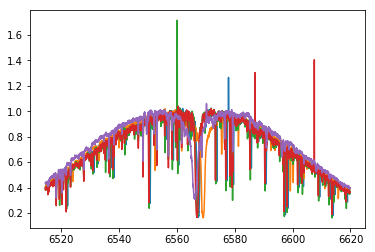

In [26]:
normalized_plot(99)

In [1]:
file = pf.open('rbni.983.fits')
header = file[0].header
target_object = header['TOBJECT']
image = file[0].data
        
wave = pf.open('apf_wav copy.fits')
wave_values = wave[0].data
        
x = wave_values[53,0:4600]
y = image[53,0:4600]
y_norm = y/np.percentile(np.sort(y),percentile)
plt.plot(x,y_norm)

NameError: name 'pf' is not defined

## Deblazing

In [27]:
# We want to find a polynomial that describes the curve in the data along the top of the continuum. 
# step 1: divide up the spectrum into n sections 
# step 2: pick one data point foe each section that is the 

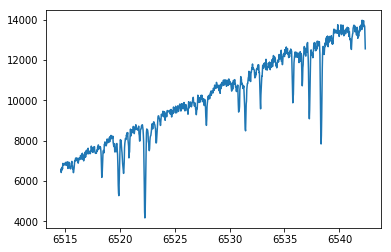

In [28]:
plt.plot(wave_values[53,0:1000],image1[53,0:1000])

In [29]:
import scipy as sc
from scipy import signal

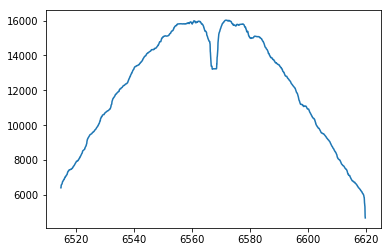

In [30]:
y_medfit1 = sc.signal.medfilt(image1[53,0:4600], kernel_size = 151)
plt.plot(wave_values[53,0:4600],y_medfit1)

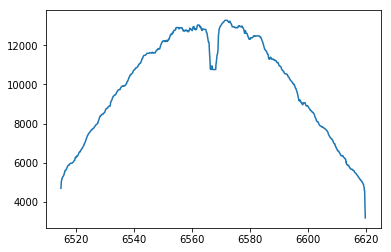

In [31]:
y_medfit3 = sc.signal.medfilt(image3[53,0:4600], kernel_size = 151)
plt.plot(wave_values[53,0:4600],y_medfit3)

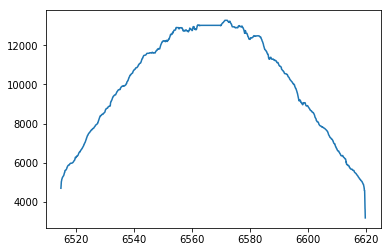

In [32]:
y_medfit3[1800:2200]
max3 = np.max(np.percentile(y_medfit3, 96))
fix = np.where(y_medfit3[1800:2200]>13000.0, y_medfit3[1800:2200], max3)

new1_y_medfit3 = np.append(y_medfit3[:1800],fix)
new2_y_medfit3 = np.append(new1_y_medfit3, y_medfit3[2200:])

plt.plot(wave_values[53,0:4600], new2_y_medfit3)


In [33]:
def deblazed_plot(bin_size):
    for i in np.arange(0,5):
        files = np.array(['rbni.983.fits','rbni.993.fits','rbnj.172.fits','rbnj.231.fits','rbnj.234.fits'])
        file = pf.open(files[i])
        header = file[0].header
        target_object = header['TOBJECT']
        image = file[0].data
        
        wave = pf.open('apf_wav copy.fits')
        wave_values = wave[0].data
        
        x = wave_values[53,0:4600]
        y = image[53,0:4600]
        normalizer = np.percentile(np.sort(y),99)
        y_norm = y/normalizer
        
        y_medfit = sc.signal.medfilt(y_norm, kernel_size = bin_size)
        maximum = np.max(np.percentile(y_medfit, 96))
        fix = np.where(y_medfit[1750:2350]>0.97, y_medfit[1750:2350], maximum)

        new_y_medfit = np.append(y_medfit[:1750],fix)
        blaze = np.append(new_y_medfit, y_medfit[2350:])
        plt.plot(x,y_norm/blaze)

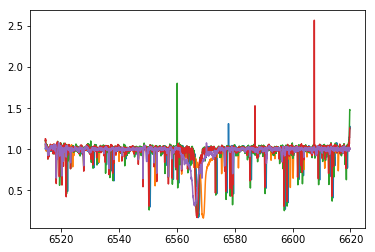

In [49]:
deblazed_plot(151)

## Finding delta-lambda/lambda for APF at 5500 Angstroms

In [35]:
wave_values[39,2840:2850]

array([5499.95103111, 5499.96864905, 5499.98626689, 5500.00437297,
       5500.02199063, 5500.04009652, 5500.05820231, 5500.07581968,
       5500.09392529, 5500.11154247])

In [36]:
dl_l = (wave_values[39,2844:2845]-wave_values[39,2843:2844])/wave_values[39,2843:2844]
dl_l

array([3.20320769e-06])

In [37]:
v = (dl_l*3*10**5)[0]
print ("%s km/s" %(v))

0.960962307604794 km/s


In [38]:
lambda1 = wave_values[39,0]
lambda1

5441.051521590862

In [39]:
lambda2 = lambda1 + (wave_values[39,1])*v/(3*10**5)
lambda2

5441.0689504819775

In [40]:
(lambda2 - lambda1)/lambda1

3.2032211138934376e-06

In [41]:
lambda3 = lambda2 + (wave_values[39,2])*v/(3*10**5)
lambda3

5441.086379449254

In [42]:
(lambda3 - lambda2)/lambda2

3.203224850750018e-06

In [43]:
shifted = np.array([lambda1])
for i in np.arange(0,4600):
    new_lambda = shifted[i] + (wave_values[39,i+1])*v/(3*10**5)
    shifted = np.append(shifted, new_lambda)

In [44]:
shifted

array([5441.05152159, 5441.06895048, 5441.08637945, ..., 5521.88233325,
       5521.90003973, 5521.91774625])

In [52]:
def shifted_plot(bin_size):
    for i in np.arange(0,5):
        files = np.array(['rbni.983.fits','rbni.993.fits','rbnj.172.fits','rbnj.231.fits','rbnj.234.fits'])
        file = pf.open(files[i])
        header = file[0].header
        target_object = header['TOBJECT']
        image = file[0].data
        
        wave = pf.open('apf_wav copy.fits')
        wave_values = wave[0].data
        
        x = wave_values[53,0:4600]
        y = image[53,0:4600]
        normalizer = np.percentile(np.sort(y),99)
        y_norm = y/normalizer
        
        y_medfit = sc.signal.medfilt(y_norm, kernel_size = bin_size)
        maximum = np.max(np.percentile(y_medfit, 96))
        fix = np.where(y_medfit[1750:2350]>0.97, y_medfit[1750:2350], maximum)

        new_y_medfit = np.append(y_medfit[:1750],fix)
        blaze = np.append(new_y_medfit, y_medfit[2350:])
        
        lambda1 = lambda1 = wave_values[53,0]
        
        shifted = np.array([lambda1])
        for i in np.arange(0,4599):
            new_lambda = shifted[i] + (wave_values[53,i+1])*v/(3*10**5)
            shifted = np.append(shifted, new_lambda)
            
        plt.plot(shifted,y_norm/blaze)

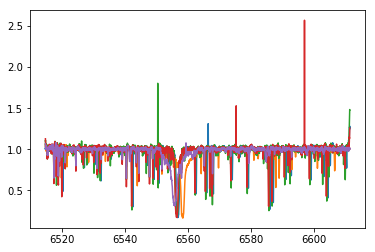

In [53]:
shifted_plot(151)